# Importation Dataframe Finale

In [1]:
# Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from scipy.stats import ks_2samp
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition, preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import time

In [2]:
#Importation du fichier donnees_finales_finales.csv pour l'étape d'analyse
donnees_finales_finales = pd.read_csv("donnees_finales_finales.csv")
donnees_finales_finales

Zone  Exportations Totale  Importations Totale  \
0              Afghanistan         5.087539e+05           5744812.41   
1           Afrique du Sud         1.036191e+07           8484389.81   
2                  Albanie         1.443889e+05            746435.80   
3                  Algérie         7.211912e+05          19196987.58   
4                Allemagne         5.160364e+07          65227221.40   
..                     ...                  ...                  ...   
166    Émirats arabes unis         5.640253e+06          15497705.42   
167               Équateur         7.827846e+06           2854613.31   
168  États-Unis d'Amérique         1.975061e+08          73248545.30   
169               Éthiopie         1.065990e+06           3215899.61   
170           Îles Salomon         7.907564e+04            104150.99   

     Production Totale  Exportations volailles  Importations volailles  \
0         1.666857e+07                     NaN                28937.00   
1         8.302040e+07                58258.84               480345.55   
2         4.846865e+06                     NaN                17280.00   
3         3.858510e+07                     NaN                    0.40   
4         2.356890e+08               300560.64               474950.63   
..                 ...                     ...                     ...   
166       5.482110e+06                23131.16               440543.31   
167       3.457895e+07                     NaN                     NaN   
168       1.188369e+09              3191436.30                58075.28   
169       7.204335e+07                     NaN                  177.49   
170       7.976045e+05                     NaN                 3737.25   

     Production volailles  Taux export volailles  Taux import volailles  \
0                27849.94               0.001417           5.037066e-03   
1              1658159.00               0.005622           5.661521e-02   
2                12912.00               0.001417           2.315002e-02   
3               262965.06               0.001417           2.083660e-08   
4              1009565.00               0.005824           7.281479e-03   
..                    ...                    ...                    ...   
166              57387.00               0.004101           2.842636e-02   
167             338000.00               0.001417           8.658302e-03   
168           19140570.00               0.016159           7.928523e-04   
169              71938.44               0.001417           5.519140e-05   
170                294.48               0.001417           3.588300e-02   

     Taux production volailles  Croissance_population (%)  \
0                     0.001671                       0.03   
1                     0.019973                       0.01   
2                     0.002664                       0.00   
3                     0.006815                       0.02   
4                     0.004283                       0.00   
..                         ...                        ...   
166                   0.010468                       0.02   
167                   0.009775                       0.02   
168                   0.016107                       0.01   
169                   0.000999                       0.03   
170                   0.000369                       0.01   

     Stabilité politique      PIB  
0                  -2.80   2096.1  
1                  -0.28  13950.5  
2                   0.38  12771.0  
3                  -0.92  11809.5  
4                   0.59  53071.5  
..                   ...      ...  
166                 0.62  71182.4  
167                -0.07  11679.4  
168                 0.29  59914.8  
169                -1.68   1988.0  
170                 0.20   2625.1  

[171 rows x 13 columns]

In [3]:
#La nature des données dans chacune des colonnes
donnees_finales_finales.dtypes

Zone                          object
Exportations Totale          float64
Importations Totale          float64
Production Totale            float64
Exportations volailles       float64
Importations volailles       float64
Production volailles         float64
Taux export volailles        float64
Taux import volailles        float64
Taux production volailles    float64
Croissance_population (%)    float64
Stabilité politique          float64
PIB                          float64
dtype: object

In [4]:
#On supprime les donnes ayant servi à calculer les taux pour ne laisser que les éléments à analyser
donnees_finales_finales = donnees_finales_finales.drop(['Exportations Totale'],axis = 1)
donnees_finales_finales = donnees_finales_finales.drop(['Importations Totale'],axis = 1)
donnees_finales_finales = donnees_finales_finales.drop(['Production Totale'],axis = 1)
donnees_finales_finales = donnees_finales_finales.drop(['Exportations volailles'],axis = 1)
donnees_finales_finales = donnees_finales_finales.drop(['Importations volailles'],axis = 1)
donnees_finales_finales = donnees_finales_finales.drop(['Production volailles'],axis = 1)
donnees_finales_finales


Zone  Taux export volailles  Taux import volailles  \
0              Afghanistan               0.001417           5.037066e-03   
1           Afrique du Sud               0.005622           5.661521e-02   
2                  Albanie               0.001417           2.315002e-02   
3                  Algérie               0.001417           2.083660e-08   
4                Allemagne               0.005824           7.281479e-03   
..                     ...                    ...                    ...   
166    Émirats arabes unis               0.004101           2.842636e-02   
167               Équateur               0.001417           8.658302e-03   
168  États-Unis d'Amérique               0.016159           7.928523e-04   
169               Éthiopie               0.001417           5.519140e-05   
170           Îles Salomon               0.001417           3.588300e-02   

     Taux production volailles  Croissance_population (%)  \
0                     0.001671                       0.03   
1                     0.019973                       0.01   
2                     0.002664                       0.00   
3                     0.006815                       0.02   
4                     0.004283                       0.00   
..                         ...                        ...   
166                   0.010468                       0.02   
167                   0.009775                       0.02   
168                   0.016107                       0.01   
169                   0.000999                       0.03   
170                   0.000369                       0.01   

     Stabilité politique      PIB  
0                  -2.80   2096.1  
1                  -0.28  13950.5  
2                   0.38  12771.0  
3                  -0.92  11809.5  
4                   0.59  53071.5  
..                   ...      ...  
166                 0.62  71182.4  
167                -0.07  11679.4  
168                 0.29  59914.8  
169                -1.68   1988.0  
170                 0.20   2625.1  

[171 rows x 7 columns]

## Analyse : Les clusterings et leurs visualisations

In [5]:
# Création du df X de type numerique, en indexant le champs 'Zone'
X = donnees_finales_finales.set_index(['Zone'])
X

Taux export volailles  Taux import volailles  \
Zone                                                                  
Afghanistan                         0.001417           5.037066e-03   
Afrique du Sud                      0.005622           5.661521e-02   
Albanie                             0.001417           2.315002e-02   
Algérie                             0.001417           2.083660e-08   
Allemagne                           0.005824           7.281479e-03   
...                                      ...                    ...   
Émirats arabes unis                 0.004101           2.842636e-02   
Équateur                            0.001417           8.658302e-03   
États-Unis d'Amérique               0.016159           7.928523e-04   
Éthiopie                            0.001417           5.519140e-05   
Îles Salomon                        0.001417           3.588300e-02   

                       Taux production volailles  Croissance_population (%)  \
Zone                                                                          
Afghanistan                             0.001671                       0.03   
Afrique du Sud                          0.019973                       0.01   
Albanie                                 0.002664                       0.00   
Algérie                                 0.006815                       0.02   
Allemagne                               0.004283                       0.00   
...                                          ...                        ...   
Émirats arabes unis                     0.010468                       0.02   
Équateur                                0.009775                       0.02   
États-Unis d'Amérique                   0.016107                       0.01   
Éthiopie                                0.000999                       0.03   
Îles Salomon                            0.000369                       0.01   

                       Stabilité politique      PIB  
Zone                                                 
Afghanistan                          -2.80   2096.1  
Afrique du Sud                       -0.28  13950.5  
Albanie                               0.38  12771.0  
Algérie                              -0.92  11809.5  
Allemagne                             0.59  53071.5  
...                                    ...      ...  
Émirats arabes unis                   0.62  71182.4  
Équateur                             -0.07  11679.4  
États-Unis d'Amérique                 0.29  59914.8  
Éthiopie                             -1.68   1988.0  
Îles Salomon                          0.20   2625.1  

[171 rows x 6 columns]

In [6]:
X = X[np.isfinite(X).all(1)]

In [7]:
# Centrage et Réduction :
# Réduction des données pour que nos données puissent prendre la même importance (standardiser les données)
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-0.27106483, -0.51081709, -0.49690523,  0.71212631, -3.05303417,
        -0.87892521],
       [ 0.05790243,  1.09620198,  0.47742221, -0.18795899, -0.23745748,
        -0.29967486],
       [-0.27106483,  0.0535276 , -0.44403228, -0.63800164,  0.49995546,
        -0.35730965],
       ...,
       [ 0.88219814, -0.64305395,  0.2715952 , -0.18795899,  0.39939915,
         1.94631284],
       [-0.27106483, -0.66603724, -0.53269366,  0.71212631, -1.80166675,
        -0.88420738],
       [-0.27106483,  0.4502489 , -0.56619699, -0.18795899,  0.29884284,
        -0.85307629]])

In [8]:
# Définition de la fonction pour le graphique Cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(20, 20))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='17', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.figure(figsize=[60, 25])
            plt.show(block=False)


# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Définition de la fonction pour le graphique Éboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

In [9]:
# Calcul des composantes principales, avec 6 composentes
pca = PCA(n_components = 6)
pca.fit(X_scaler)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.33421998 0.18754858 0.17121818 0.14408789 0.11113003 0.05179534]
[2.01718569 1.13195001 1.03338784 0.86964289 0.6707256  0.31261093]


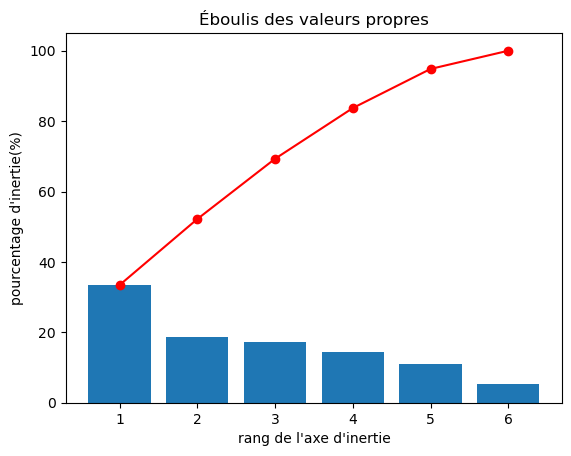

In [10]:
pcs = pca.components_
# Affichage d'un graphique 'Eboulis des valeur propres' pour déterminer le nombre de dimenssion a utiliser.
display_scree_plot(pca)

In [11]:
# Calcule de la variance et de la variance cumulé pour chaque dimenssion.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance" : pca.explained_variance_,
        "% variance" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

Dimension  Variance  % variance  % cum. variance
0      Dim1  2.017186        33.0             33.0
1      Dim2  1.131950        19.0             52.0
2      Dim3  1.033388        17.0             69.0
3      Dim4  0.869643        14.0             84.0
4      Dim5  0.670726        11.0             95.0
5      Dim6  0.312611         5.0            100.0

#### On va choisir 4 composantes principales, car les 4 premières dimensions représentent 84% des informations importantes.

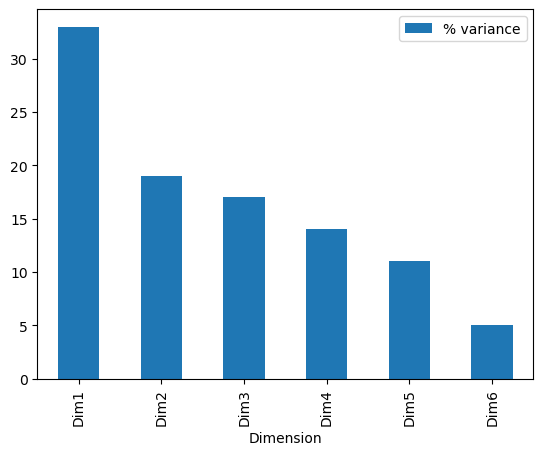

In [12]:
# Affiche de la variance cumulé sous forme de Graphiques en Bar
variance.plot.bar(x = "Dimension", y = "% variance")
plt.show()

In [13]:
X_pca = pca.transform(X)

C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [14]:
# Création d'un df pour 4 dimenssion
X_pca_df = pd.DataFrame({
    'f1' : X_pca[:,0], 
    'f2' : X_pca[:,1],
    'f3' : X_pca[:,2], 
    'f4' : X_pca[:,3],
    'Pays' : X.index,
})
X_pca_df.head()

f1           f2           f3           f4            Pays
0   1268.903200  -264.151135   344.882583  -252.982520     Afghanistan
1   8454.854320 -1756.279262  2289.013755 -1690.651885  Afrique du Sud
2   7740.334023 -1607.752996  2095.256711 -1547.944010         Albanie
3   7156.907200 -1486.845189  1937.961103 -1430.920307         Algérie
4  32165.405357 -6681.393077  8707.457310 -6432.281991       Allemagne

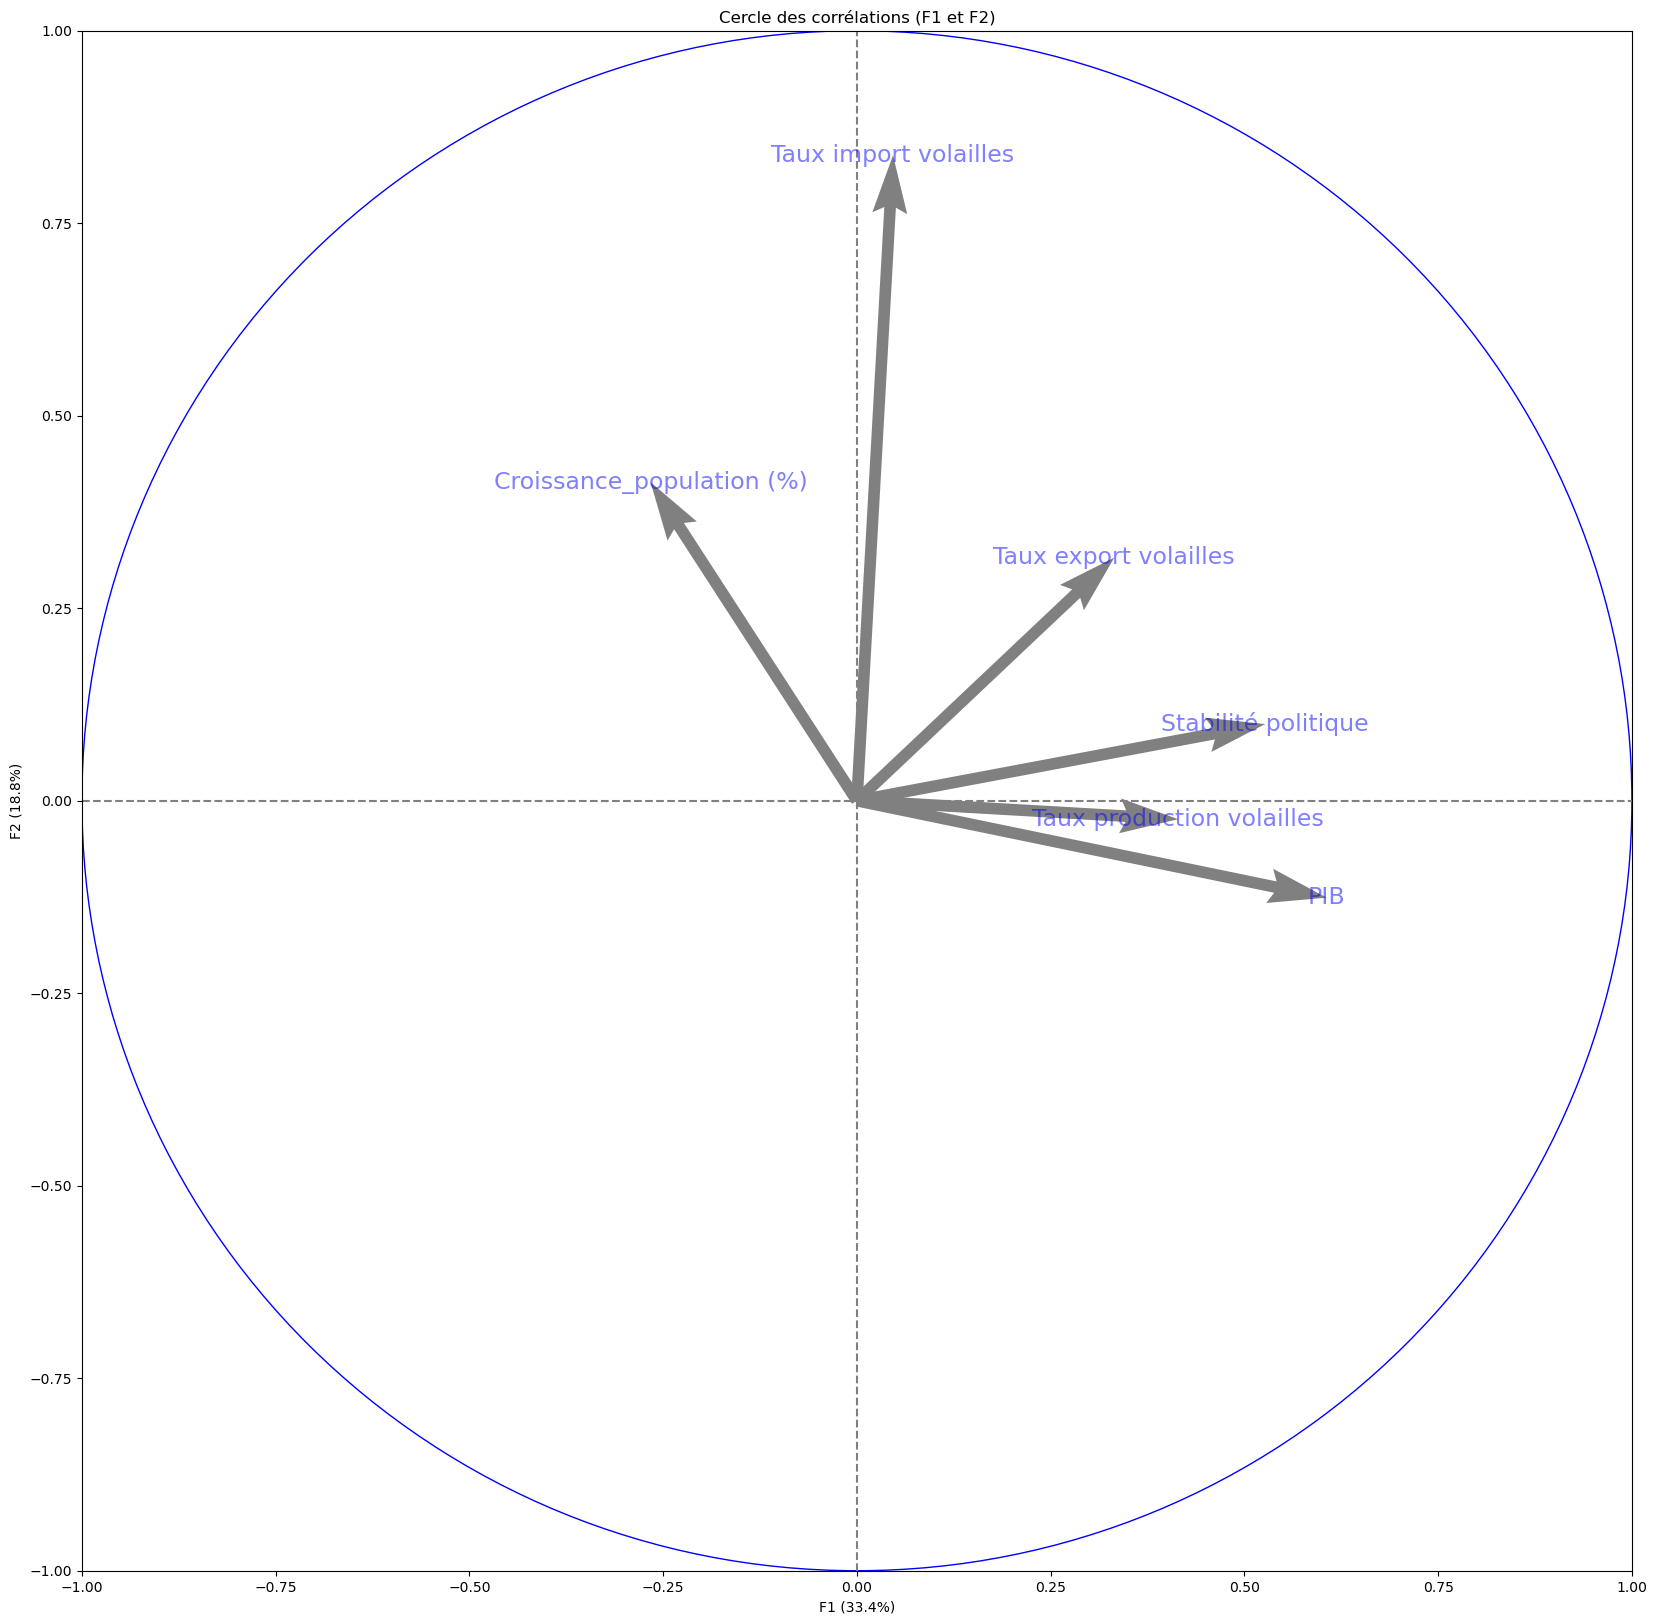

<Figure size 6000x2500 with 0 Axes>

In [15]:
# Cercle des corrélations en fonction de F1 et F2
display_circles(pcs, 6, pca, [(0,1)], labels = np.array(X.columns))

## Avec le cercle des corrélations F1-F2 (la projection de la flèche sur F1 correspond au coefficient de corrélation ),on peut trouver des variables qui sont bien corrélées aux composantes principales:
    
     Les variables les plus corrélées positivement à F1 sont:
          - PIB
          - Stabilité politique
          - Taux exporations volailles
     Les variables corrélées légèrement positivement à F1 sont:  
          - Taux importation volaille
          - Taux de production

     Les variables les plus corrélées négativement à F1 sont:
          - Croissance population
            
     Les variables corrélées positivement à F2 sont:     
          - Taux croissance population
          - Taux importations volailles
    
     Les variables corrélées négativement à F2 sont:
          - PIB  

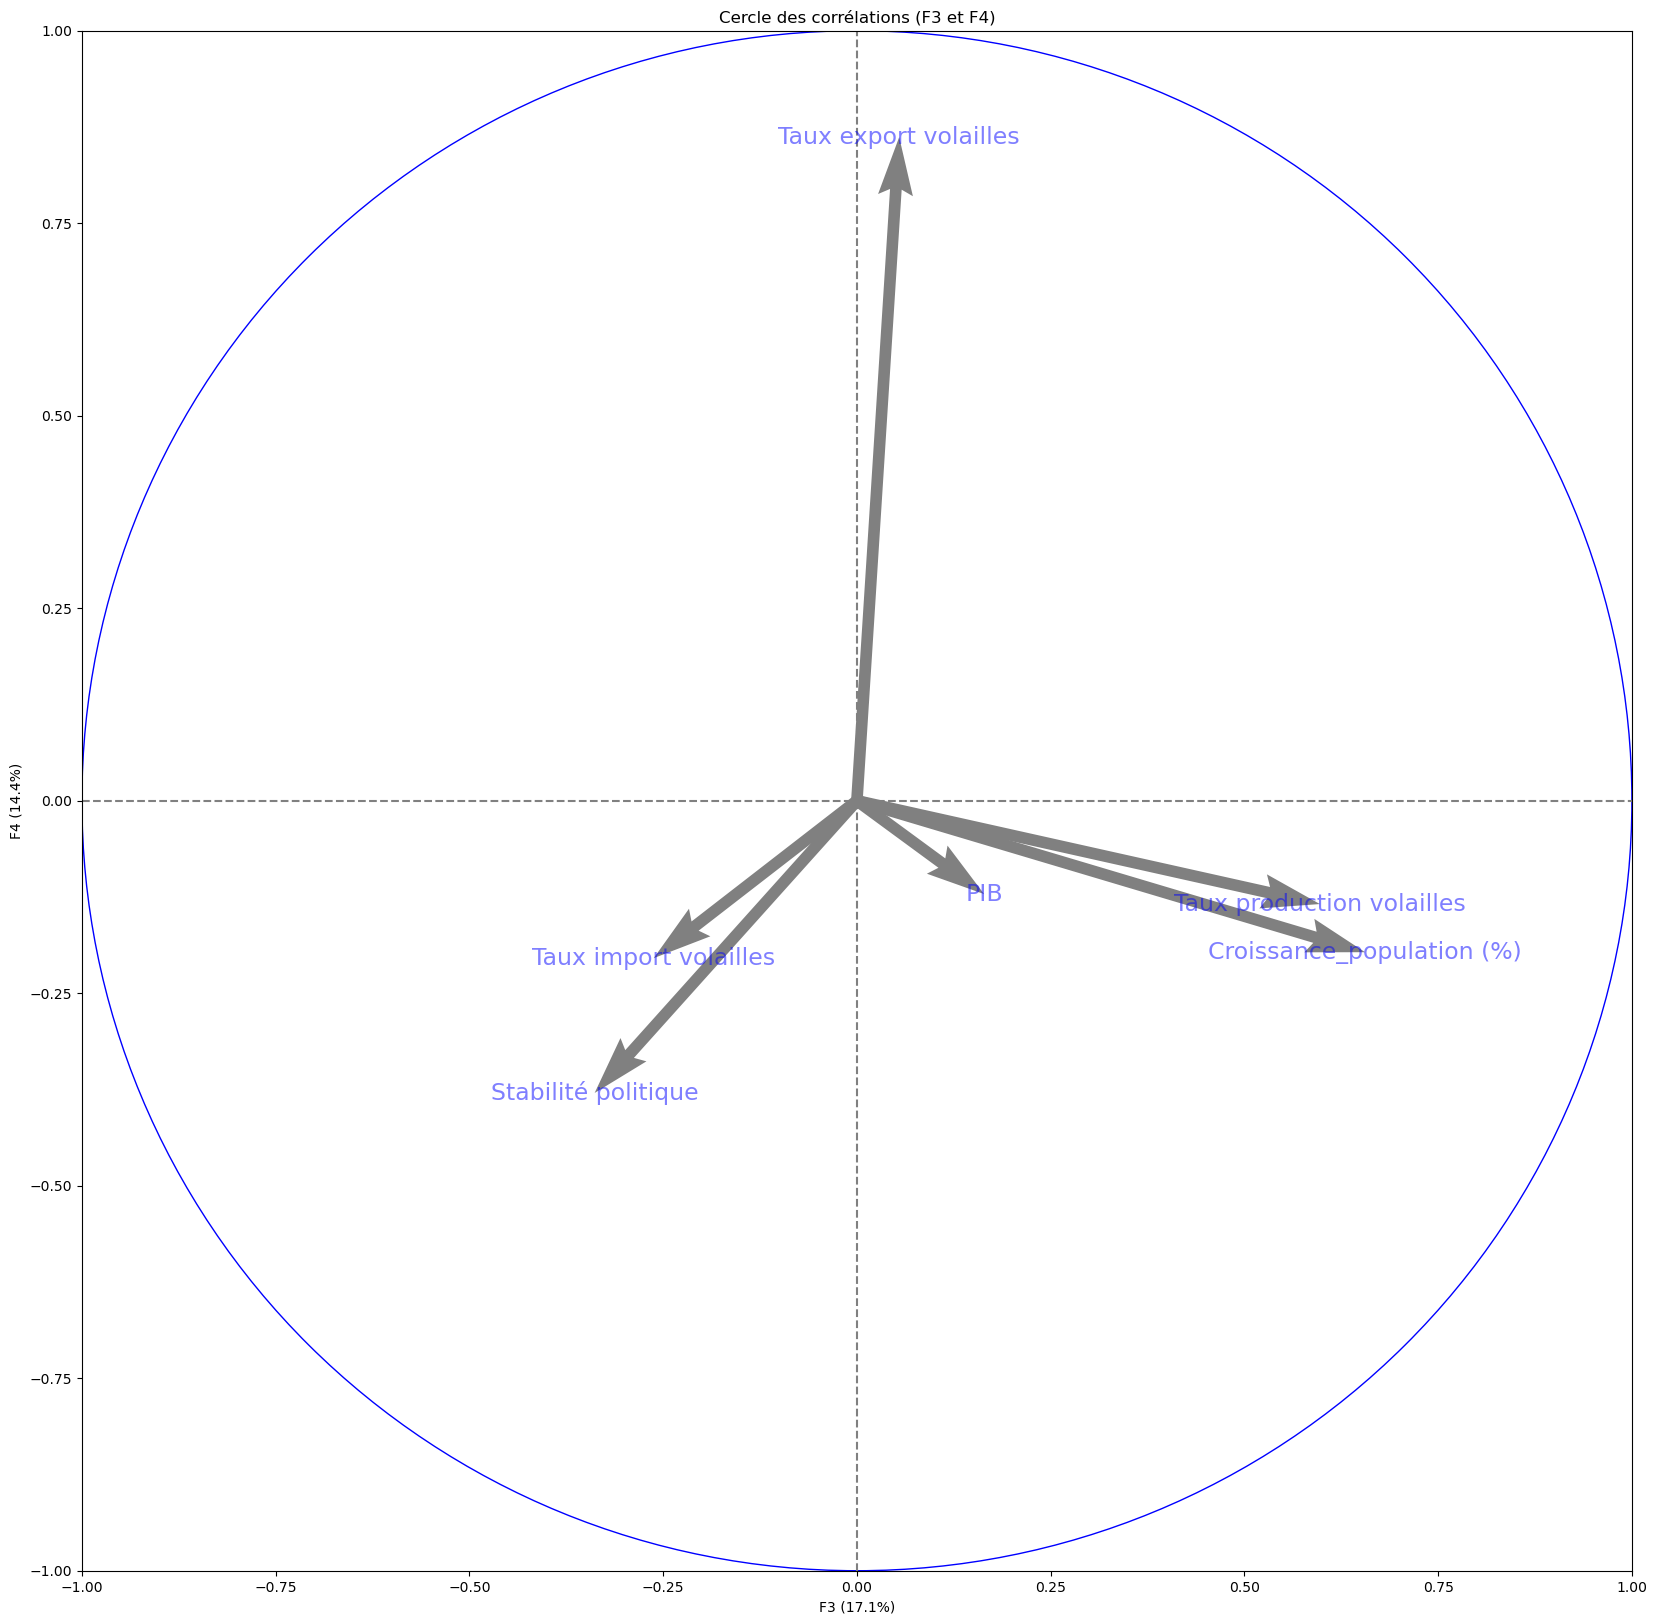

<Figure size 6000x2500 with 0 Axes>

In [16]:
# Cercle des corrélations en fonction de F3 et F4
display_circles(pcs, 6, pca, [(2,3)], labels = np.array(X.columns))

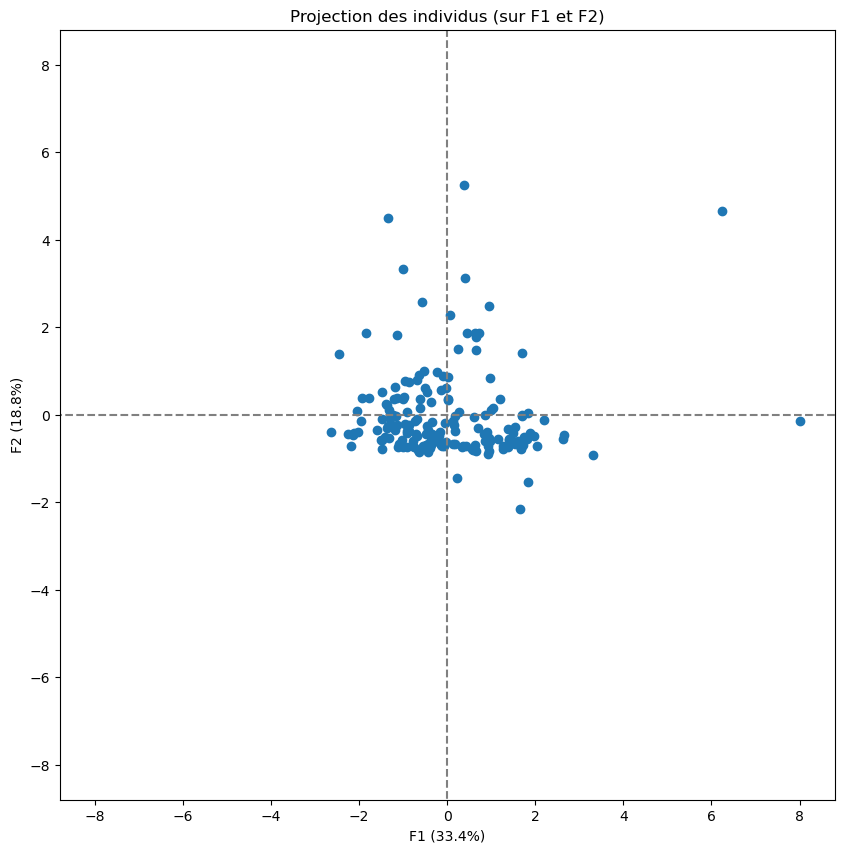

In [17]:
# Projection des individues en fonction de F1 et F2
X_projected = pca.transform(X_scaler)
display_factorial_planes(X_projected, 6, pca, [(0, 1)])

plt.show()

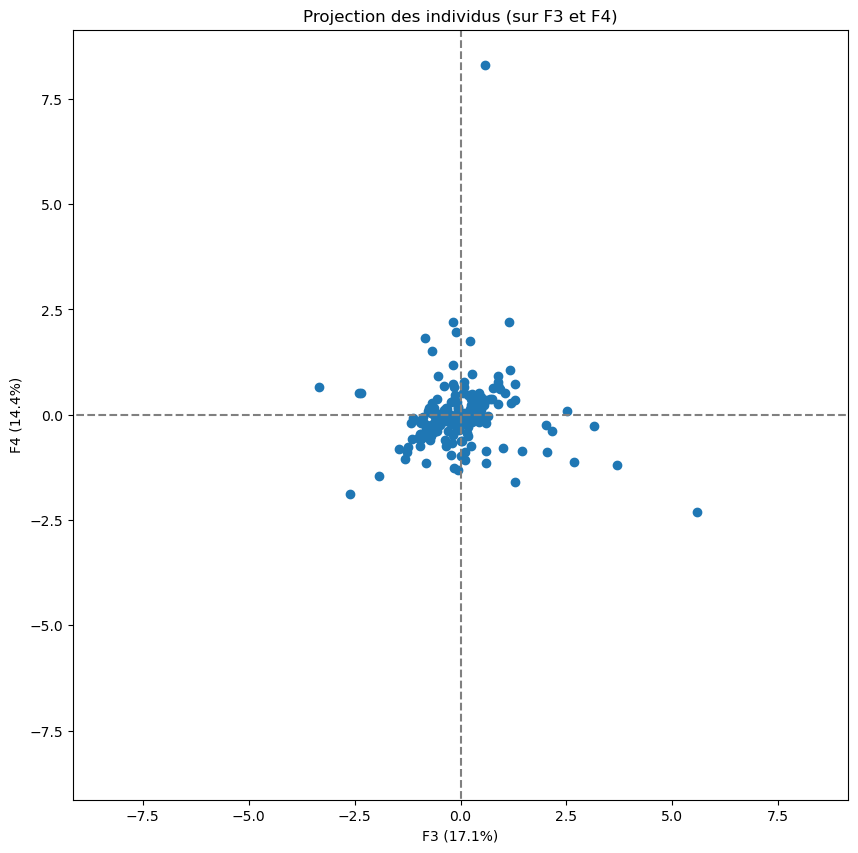

In [18]:
# Projection des individues en fonction de F3 et F4
display_factorial_planes(X_projected, 6, pca, [(2, 3)])

plt.show()

In [19]:
# Création DF avec les valeurs des composantes principales
df_ACP = pd.DataFrame(X_projected, index = X.index, columns = ["F" + str(i + 1) for i in range (6)]).reset_index()
df_ACP = df_ACP[['Zone','F1','F2','F3','F4']]
df_ACP

Zone        F1        F2        F3        F4
0              Afghanistan -2.650715 -0.400649  1.178200  1.062586
1           Afrique du Sud  0.011451  0.862227 -0.091100 -0.074832
2                  Albanie -0.054772 -0.199219 -0.940248 -0.205892
3                  Algérie -1.030265 -0.575586  0.454902  0.291753
4                Allemagne  1.389522 -0.731515 -0.496603 -0.146964
..                     ...       ...       ...       ...       ...
165    Émirats arabes unis  1.826264  0.034628  0.244052 -0.739069
166               Équateur -0.455844 -0.257844  0.155868 -0.144191
167  États-Unis d'Amérique  1.815613 -0.550155  0.439919  0.504839
168               Éthiopie -2.016613 -0.404683  0.773179  0.624843
169           Îles Salomon -0.613165  0.364870 -0.835428 -0.222724

[170 rows x 5 columns]

# Classification ascendante hierarchique

In [20]:
# consigne=>Classification ascendante hiérarchique avec dendogramme comme visualisation

In [21]:
# moyennes nulles :
np.mean(X_scaler, axis=0)

array([-2.61228947e-17, -7.31441052e-17,  0.00000000e+00, -1.43675921e-17,
       -2.08983158e-17, -8.35932630e-17])

In [22]:
# Et les écarts-type unitaires.
np.std(X_scaler, axis = 0)

array([1., 1., 1., 1., 1., 1.])

Text(0.5, 1.0, 'Visualisation après standardisation')

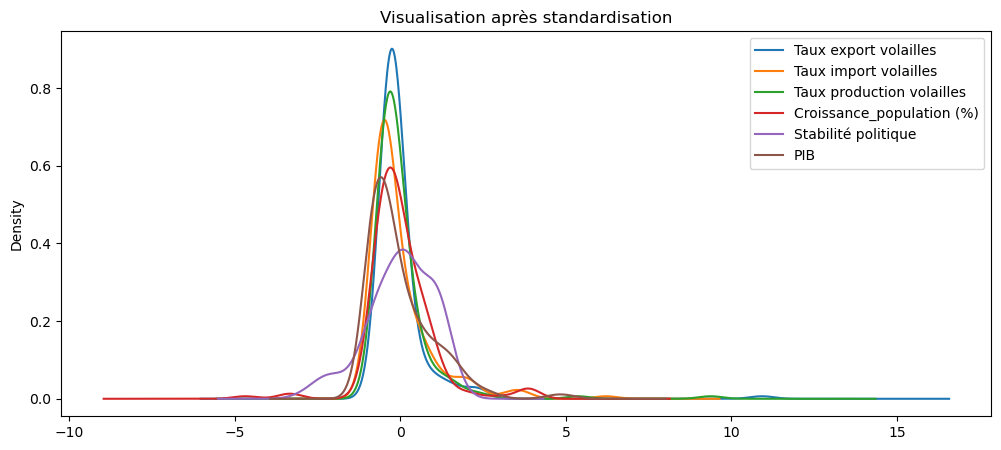

In [23]:
# vérif 
#visualisation après standardisation 
pd.DataFrame(X_scaler, columns = X.columns).plot(kind='density', sharex=True, figsize=(12,5), layout=(10,1))
plt.title('Visualisation après standardisation')

In [24]:
def plot_dendrogram(Z, names, figsize=(15,30)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Dendrogramme Classification ascendante hiérarchique', fontsize=20)
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
        leaf_font_size=12,
    )

In [25]:
# Clustering hiérarchique
Z = linkage(X_scaler, 'ward')
names = X.index

# Affichage du dendrogramme
plot_dendrogram(Z, names,figsize=(20,30))

## Sur la base du graphique dendrogramme ci-dessus, le nombre de clusters est 4.

In [26]:
# Création d'un modèle de clustering hiérarchique
hiercluster = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
# Découpage du dendrogramme en 4 clusters
hiercluster.set_params(n_clusters = 4)
clusters = hiercluster.fit_predict(X_scaler)

C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [27]:
# Création d'un modèle PCA pour réduire les données à 4 dimensions pour la visualisation.
pca = PCA(n_components = 4)
pca.fit(X_scaler)
X_reduced = pca.transform(X_scaler)

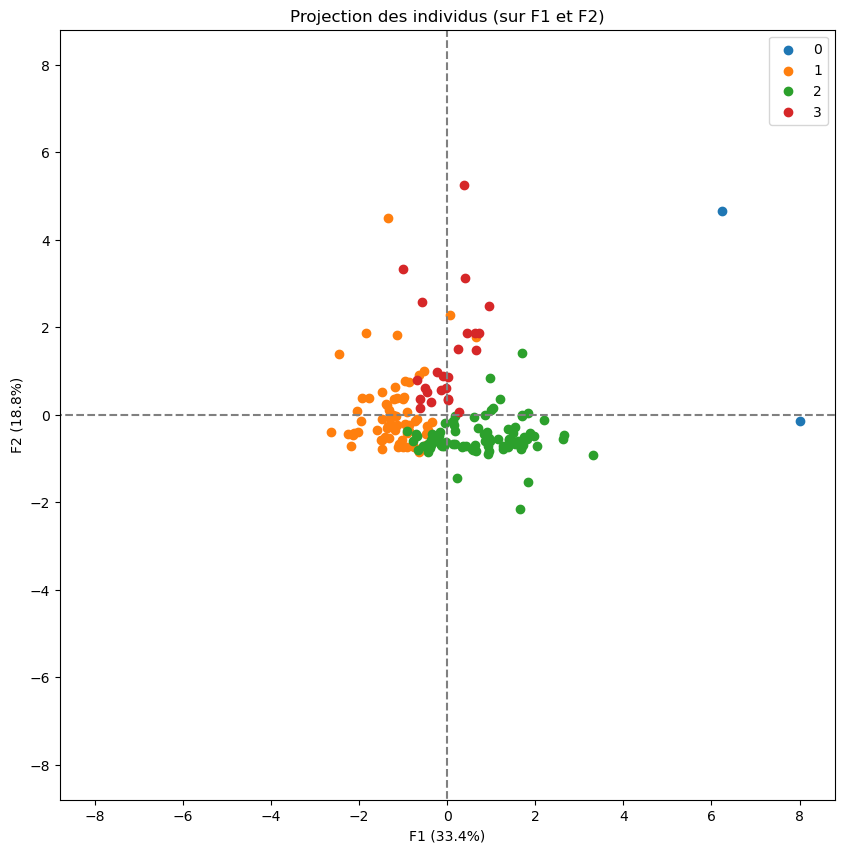

In [28]:
# Projection des individus sur F1 et F2
display_factorial_planes(X_reduced, 4, pca, [(0,1)], illustrative_var = clusters)

In [29]:
# Projection des individus sur F3 et F4
display_factorial_planes(X_reduced, 4, pca, [(2,3)], illustrative_var = clusters)

In [30]:
# Ajout du numéro de cluster aux données originales
X_scaler_with_cluster = pd.DataFrame(X_scaler, columns = X.columns, index = X.index)
X_scaler_with_cluster['Cluster'] = clusters

X_scaler_with_cluster

Taux export volailles  Taux import volailles  \
Zone                                                                  
Afghanistan                        -0.271065              -0.510817   
Afrique du Sud                      0.057902               1.096202   
Albanie                            -0.271065               0.053528   
Algérie                            -0.271065              -0.667756   
Allemagne                           0.073706              -0.440888   
...                                      ...                    ...   
Émirats arabes unis                -0.061117               0.217922   
Équateur                           -0.271065              -0.397990   
États-Unis d'Amérique               0.882198              -0.643054   
Éthiopie                           -0.271065              -0.666037   
Îles Salomon                       -0.271065               0.450249   

                       Taux production volailles  Croissance_population (%)  \
Zone                                                                          
Afghanistan                            -0.496905                   0.712126   
Afrique du Sud                          0.477422                  -0.187959   
Albanie                                -0.444032                  -0.638002   
Algérie                                -0.223039                   0.262084   
Allemagne                              -0.357818                  -0.638002   
...                                          ...                        ...   
Émirats arabes unis                    -0.028577                   0.262084   
Équateur                               -0.065486                   0.262084   
États-Unis d'Amérique                   0.271595                  -0.187959   
Éthiopie                               -0.532694                   0.712126   
Îles Salomon                           -0.566197                  -0.187959   

                       Stabilité politique       PIB  Cluster  
Zone                                                           
Afghanistan                      -3.053034 -0.878925        1  
Afrique du Sud                   -0.237457 -0.299675        3  
Albanie                           0.499955 -0.357310        2  
Algérie                          -0.952525 -0.404292        1  
Allemagne                         0.734587  1.611924        2  
...                                    ...       ...      ...  
Émirats arabes unis               0.768106  2.496890        2  
Équateur                         -0.002826 -0.410649        1  
États-Unis d'Amérique             0.399399  1.946313        2  
Éthiopie                         -1.801667 -0.884207        1  
Îles Salomon                      0.298843 -0.853076        3  

[170 rows x 7 columns]

In [31]:
# Création df des moyen de chaques variables par Cluster
X_clustered_mean = X_scaler_with_cluster.groupby('Cluster').mean()
X_clustered_mean

Taux export volailles  Taux import volailles  \
Cluster                                                 
0                     5.626921               1.289479   
1                    -0.228825              -0.179166   
2                     0.058559              -0.380989   
3                    -0.065881               1.648693   

         Taux production volailles  Croissance_population (%)  \
Cluster                                                         
0                         5.467683                  -0.412980   
1                        -0.230629                   0.740700   
2                         0.135717                  -0.493544   
3                        -0.308284                  -0.244214   

         Stabilité politique       PIB  
Cluster                                 
0                   1.337925  3.485291  
1                  -0.889921 -0.600967  
2                   0.528371  0.503047  
3                   0.441298 -0.410685

In [32]:
# heatmap de corrélations entre les différentes variables et les Cluster
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(X_clustered_mean, annot = True, vmin = -1, vmax = 1)

<Axes: ylabel='Cluster'>

- On peut déjà constater que:<br> 

- les pays du cluster 0 et 2 sont caractérisé par un PIB important, une stabilité politique et un fort taux de production de volaille. <br> 

- Les pays du cluster 1 et 3 quant à eux sont caractérisés par un taux de production faible et une instabilité politique 

<b style="color:red">Via cette Méthode nous pouvons déjà établir un premier jet dans notre analyse quand à l'expansion a l'international.
Il nous faut prendre en compte : 
    - Un taux de stabilité politique élevé
    - un taux d'exportation assez faible
    - Un taux de production élevé
</b> 
 
<b style="color:red"> 
Au vue de notre Heatmap le classement des clusters est de : 
    - Cluster 0
    - Cluster 2
    - Cluster 1
    - Cluster 3    
</b>

In [33]:
# Création d'un nouveau df pour affichage des pays par groupe.
X_clusterise = X_scaler_with_cluster.reset_index()
X_clusterise

Zone  Taux export volailles  Taux import volailles  \
0              Afghanistan              -0.271065              -0.510817   
1           Afrique du Sud               0.057902               1.096202   
2                  Albanie              -0.271065               0.053528   
3                  Algérie              -0.271065              -0.667756   
4                Allemagne               0.073706              -0.440888   
..                     ...                    ...                    ...   
165    Émirats arabes unis              -0.061117               0.217922   
166               Équateur              -0.271065              -0.397990   
167  États-Unis d'Amérique               0.882198              -0.643054   
168               Éthiopie              -0.271065              -0.666037   
169           Îles Salomon              -0.271065               0.450249   

     Taux production volailles  Croissance_population (%)  \
0                    -0.496905                   0.712126   
1                     0.477422                  -0.187959   
2                    -0.444032                  -0.638002   
3                    -0.223039                   0.262084   
4                    -0.357818                  -0.638002   
..                         ...                        ...   
165                  -0.028577                   0.262084   
166                  -0.065486                   0.262084   
167                   0.271595                  -0.187959   
168                  -0.532694                   0.712126   
169                  -0.566197                  -0.187959   

     Stabilité politique       PIB  Cluster  
0              -3.053034 -0.878925        1  
1              -0.237457 -0.299675        3  
2               0.499955 -0.357310        2  
3              -0.952525 -0.404292        1  
4               0.734587  1.611924        2  
..                   ...       ...      ...  
165             0.768106  2.496890        2  
166            -0.002826 -0.410649        1  
167             0.399399  1.946313        2  
168            -1.801667 -0.884207        1  
169             0.298843 -0.853076        3  

[170 rows x 8 columns]

In [34]:
# Création df du Cluster 0
clus_0 = X_clusterise.loc[X_clusterise['Cluster'] == 0].reset_index(drop = True)
clus_0

Zone  Taux export volailles  Taux import volailles  \
0  Chine - RAS de Hong-Kong              10.923549               1.964432   
1      Chine - RAS de Macao               0.330293               0.614527   

   Taux production volailles  Croissance_population (%)  Stabilité politique  \
0                   1.562543                  -0.638002             1.002737   
1                   9.372823                  -0.187959             1.673112   

        PIB  Cluster  
0  1.942765        0  
1  5.027817        0

In [35]:
# Création df du Cluster 1
clus_1 = X_clusterise.loc[X_clusterise['Cluster'] == 1].reset_index(drop = True)
clus_1

Zone  Taux export volailles  Taux import volailles  \
0   Afghanistan              -0.271065              -0.510817   
1       Algérie              -0.271065              -0.667756   
2        Angola              -0.381962               1.679559   
3   Azerbaïdjan              -0.374088              -0.389272   
4    Bangladesh              -0.381764              -0.667489   
..          ...                    ...                    ...   
58       Zambie              -0.314054               0.311666   
59     Zimbabwe              -0.271065              -0.504433   
60       Égypte              -0.379738              -0.514320   
61     Équateur              -0.271065              -0.397990   
62     Éthiopie              -0.271065              -0.666037   

    Taux production volailles  Croissance_population (%)  Stabilité politique  \
0                   -0.496905                   0.712126            -3.053034   
1                   -0.223039                   0.262084            -0.952525   
2                   -0.503029                   1.162169            -0.349187   
3                   -0.199898                   0.262084            -0.762585   
4                   -0.508989                  -0.187959            -1.332404   
..                        ...                        ...                  ...   
58                  -0.450155                   1.162169             0.242978   
59                  -0.244231                   0.262084            -0.717893   
60                  -0.060715                   0.262084            -1.511171   
61                  -0.065486                   0.262084            -0.002826   
62                  -0.532694                   0.712126            -1.801667   

         PIB  Cluster  
0  -0.878925        1  
1  -0.404292        1  
2  -0.628743        1  
3  -0.291324        1  
4  -0.745298        1  
..       ...      ...  
58 -0.815432        1  
59 -0.867408        1  
60 -0.471411        1  
61 -0.410649        1  
62 -0.884207        1  

[63 rows x 8 columns]

In [36]:
# Création df du Cluster 2
clus_2 = X_clusterise.loc[X_clusterise['Cluster'] == 2].reset_index(drop = True)
clus_2

Zone  Taux export volailles  Taux import volailles  \
0                 Albanie              -0.271065               0.053528   
1               Allemagne               0.073706              -0.440888   
2         Arabie saoudite               0.575337               0.137846   
3               Argentine              -0.203032              -0.647676   
4               Australie              -0.321088              -0.649167   
..                    ...                    ...                    ...   
76           Turkménistan              -0.271065              -0.173323   
77                Uruguay              -0.339786              -0.658738   
78               Viet Nam              -0.342851              -0.585406   
79    Émirats arabes unis              -0.061117               0.217922   
80  États-Unis d'Amérique               0.882198              -0.643054   

    Taux production volailles  Croissance_population (%)  Stabilité politique  \
0                   -0.444032                  -0.638002             0.499955   
1                   -0.357818                  -0.638002             0.734587   
2                    1.153599                   0.262084            -0.639683   
3                   -0.150702                  -0.187959             0.265324   
4                   -0.141421                  -0.187959             1.080947   
..                        ...                        ...                  ...   
76                  -0.455021                  -0.638002            -0.069864   
77                  -0.469094                  -0.638002             1.248541   
78                  -0.324904                  -0.187959             0.332362   
79                  -0.028577                   0.262084             0.768106   
80                   0.271595                  -0.187959             0.399399   

         PIB  Cluster  
0  -0.357310        2  
1   1.611924        2  
2   1.256391        2  
3   0.171694        2  
4   1.383666        2  
..       ...      ...  
76 -0.311744        2  
77  0.147746        2  
78 -0.539097        2  
79  2.496890        2  
80  1.946313        2  

[81 rows x 8 columns]

In [37]:
# Création df du Cluster 3
clus_3 = X_clusterise.loc[X_clusterise['Cluster'] == 3].reset_index(drop = True)
clus_3

Zone  Taux export volailles  \
0                    Afrique du Sud               0.057902   
1                Antigua-et-Barbuda               0.679603   
2                           Arménie              -0.271065   
3                          Bulgarie              -0.118481   
4                        Cabo Verde              -0.271065   
5                           Comores              -0.381338   
6                             Congo              -0.095430   
7                         Dominique              -0.364671   
8                           Grenade              -0.271065   
9                           Géorgie               0.792324   
10                       Kazakhstan              -0.358644   
11                         Kiribati              -0.271065   
12                          Libéria              -0.328157   
13                Macédoine du Nord              -0.307112   
14                         Maldives              -0.271065   
15             Saint-Kitts-et-Nevis              -0.045750   
16  Saint-Vincent-et-les Grenadines              -0.271065   
17                     Sainte-Lucie              -0.378947   
18                            Samoa              -0.317814   
19             Sao Tomé-et-Principe              -0.271065   
20                         Suriname               2.296027   
21                      Timor-Leste              -0.271065   
22                          Vanuatu              -0.271065   
23                     Îles Salomon              -0.271065   

    Taux import volailles  Taux production volailles  \
0                1.096202                   0.477422   
1                1.959093                  -0.351276   
2                0.606010                  -0.451082   
3                0.369927                  -0.367606   
4                0.716203                  -0.286287   
5                3.167634                  -0.501019   
6                3.593456                  -0.494289   
7                3.712622                  -0.443397   
8                2.238796                  -0.209780   
9                0.397282                  -0.176339   
10               1.072485                  -0.399524   
11               0.586494                  -0.357174   
12               1.278077                  -0.227383   
13               0.753455                  -0.554474   
14               0.562032                  -0.260920   
15               2.288614                  -0.528129   
16               1.806022                  -0.413318   
17               1.822968                   0.410587   
18               6.203551                  -0.433686   
19               0.643773                  -0.300004   
20               2.158437                  -0.015689   
21               0.977649                  -0.482503   
22               1.107611                  -0.466746   
23               0.450249                  -0.566197   

    Croissance_population (%)  Stabilité politique       PIB  Cluster  
0                   -0.187959            -0.237457 -0.299675        3  
1                   -0.187959             0.913354  0.033937        3  
2                   -0.638002            -0.617337 -0.370083        3  
3                   -0.638002             0.444091  0.067756        3  
4                   -0.187959             0.935699 -0.672515        3  
5                   -0.187959             0.120076 -0.823020        3  
6                    0.712126            -0.516781 -0.782283        3  
7                   -0.187959             1.416135 -0.418849        3  
8                   -0.187959             1.203850 -0.254745        3  
9                   -0.638002            -0.338014 -0.317305        3  
10                   0.262084             0.108903  0.233551        3  
11                  -0.187959             1.058602 -0.885463        3  
12                  -0.638002            -0.293322 -0.906421        3  
13                  -0.638002            -0.203939 -0.213870        3  

# Kmeans

### Méthode du coude :¶
#### Pour visualiser le nombre de clusters optimum, nous allons utiliser la methode du ' Elbow ' :

In [38]:
df_kmeans = X_scaler

In [39]:
#Méthode du coude pour visualiser le nombre de clusters optimum:

# Calculer l'inertie (distance entre les centroïdes et les données)
from sklearn.cluster import KMeans
wcss = []
mapping1 = {}
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df_kmeans)
    wcss.append(km.inertia_)
    mapping1[i] = km.inertia_
    
    # Tracer la courbe des clusters vs l'inertie    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inerties')
plt.show()

C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

### Méthode du coefficient de silhouette

In [40]:
# Méthode du coefficient de silhouette
tab_silhouette =[]
k_range = range(2,10)
for k in k_range:
    model = KMeans(n_clusters = k)
    cluster_labels = model.fit_predict(Z)
    tab_silhouette.append(silhouette_score(Z,cluster_labels))

fig = plt.figure(figsize = (12,8))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()
tab_silhouette

C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

[0.5469136107417479,
 0.4605248945905681,
 0.437031581859399,
 0.45688433347659413,
 0.4419376175400349,
 0.43227394684197945,
 0.4262317103956585,
 0.42245466495923983]

### Sur la base du graphique de silhouette ci-dessus, le nombre de clusters idéal se situe entre 4 et 6.
#### Test avec différents nombre de clusters pour garder le nombre de cluster idéal

C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Time: 0.731550931930542
[[ 0.35160163 -0.32776126  0.12060167 -0.57254089  0.82925198  0.93034831]
 [-0.07581916  1.69089559 -0.18899395  0.59544859  0.51319744 -0.30639128]
 [-0.20045731 -0.32903563 -0.1891883   0.1888209  -0.71542475 -0.56074384]
 [-0.02582172  0.33487654  7.36996937 -0.41298031  1.03066932  2.66368877]]
[2 1 2 2 0 1 1 0 0 2 0 0 2 1 2 0 0 2 2 2 0 2 0 2 2 0 2 1 2 2 0 0 2 0 3 2 0
 2 1 1 0 0 2 0 1 2 0 0 2 0 0 0 2 1 1 1 1 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 0
 0 0 2 1 2 2 1 1 2 0 2 2 1 0 0 2 2 0 2 1 2 0 2 0 2 2 1 2 2 2 0 2 2 2 0 0 2
 1 2 2 2 0 2 2 0 2 0 0 2 0 0 2 2 0 0 2 2 2 2 1 1 1 1 1 2 0 2 0 0 2 0 1 0 2
 2 2 0 2 1 2 3 2 2 2 2 0 1 2 2 2 2 0 2 0 2 2]
Inertia : 590.02
Nombre Iteration : 5.00


C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Time: 0.7845172882080078
[[-0.20048792 -0.27999529 -0.20932721  0.28681128 -0.64668115 -0.55588749]
 [ 0.13671622 -0.36310831  0.22940681 -0.55763688  0.78705969  0.90100388]
 [-0.03169284  2.05879418 -0.22539863  0.28351426  0.57603775 -0.32576368]
 [ 0.33029341  0.61452671  9.37282312 -0.18795899  1.67311241  5.0278168 ]
 [10.92354904  1.9644317   1.56254255 -0.63800164  1.00273701  1.94276534]]
[0 2 0 0 1 2 2 1 1 0 1 1 0 2 0 1 1 0 0 0 1 0 1 0 0 1 0 2 0 0 1 1 0 4 3 0 1
 0 2 2 1 1 0 1 2 0 1 1 0 1 1 1 0 2 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 0 2 0 0 2 0 0 1 0 0 2 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 2 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 2 2 2 2 0 0 1 0 1 1 0 1 2 1 0
 0 0 1 0 2 0 1 0 0 0 0 1 2 0 0 0 0 1 0 1 0 0]
Inertia : 474.37
Nombre Iteration : 8.00


C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Time: 0.7235519886016846
[[ 1.61595273e-01 -4.32540022e-01 -2.61008224e-02 -5.87996901e-01
   1.00490952e+00  1.32619531e+00]
 [ 7.54839305e-02  2.45591750e+00 -8.25739052e-02  7.72131999e-01
   6.35520262e-01 -7.91394391e-02]
 [ 1.09235490e+01  1.96443170e+00  1.56254255e+00 -6.38001640e-01
   1.00273701e+00  1.94276534e+00]
 [-2.45552970e-01 -2.87731333e-01 -2.70455072e-01  6.28785081e-01
  -1.01025135e+00 -6.86425141e-01]
 [-2.58217184e-02  3.34876544e-01  7.36996937e+00 -4.12980315e-01
   1.03066932e+00  2.66368877e+00]
 [-7.35763550e-02 -1.34903459e-01  7.74727034e-03 -3.69427800e-01
   9.32250067e-02 -2.70308464e-01]]
[3 5 5 3 0 1 1 5 5 5 0 0 3 1 3 5 0 5 5 5 5 5 5 3 3 5 3 5 5 3 0 5 5 2 4 5 0
 5 1 1 5 0 3 0 1 5 0 0 5 5 0 0 5 1 3 3 1 5 3 3 5 5 5 3 3 0 3 5 3 3 0 0 5 0
 5 0 3 5 3 3 5 1 5 0 3 3 5 0 0 5 3 5 3 5 3 0 5 5 3 5 3 5 3 3 5 3 3 3 0 0 3
 1 3 5 3 5 3 3 0 3 0 0 5 5 0 3 3 0 5 5 3 5 3 1 1 1 1 5 5 5 5 0 0 5 0 1 0 3
 3 3 0 5 5 3 4 3 5 3 3 0 5 5 3 3 3 0 5 0 3 5]
Inertia : 409.52
Nombr

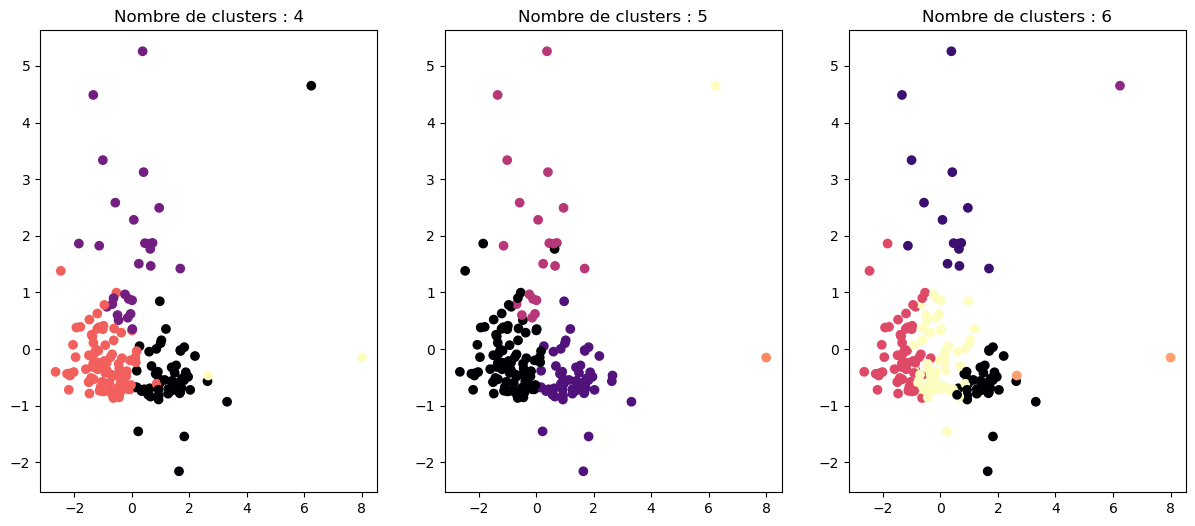

In [41]:
fig = plt.figure(figsize=(20,6))
km4 = KMeans(n_clusters=4)
start = time.time()
km4.fit(X_scaler)
ax = fig.add_subplot(142)
ax.scatter(X_projected[:,0], X_projected[:,1], c=km4.labels_, cmap='magma')
ax.set_title("Nombre de clusters : 4")
end = time.time()
print(f'Time: {end - start}')
print(km4.cluster_centers_)
print(km4.labels_)
print("Inertia : {:.2f}".format(km4.inertia_))
print("Nombre Iteration : {:.2f}".format(km4.n_iter_))

km5 = KMeans(n_clusters=5)
start = time.time()
km5.fit(X_scaler)
ax = fig.add_subplot(143)
ax.scatter(X_projected[:,0], X_projected[:,1], c=km5.labels_, cmap='magma')
ax.set_title("Nombre de clusters : 5")
end = time.time()
print(f'Time: {end - start}')
print(km5.cluster_centers_)
print(km5.labels_)
print("Inertia : {:.2f}".format(km5.inertia_))
print("Nombre Iteration : {:.2f}".format(km5.n_iter_))

km6 = KMeans(n_clusters=6)
start = time.time()
km6.fit(X_scaler)
ax = fig.add_subplot(144)
ax.scatter(X_projected[:,0], X_projected[:,1], c=km6.labels_, cmap='magma')
ax.set_title("Nombre de clusters : 6")
end = time.time()
print(f'Time: {end - start}')
print(km6.cluster_centers_)
print(km6.labels_)
print("Inertia : {:.2f}".format(km6.inertia_))
print("Nombre Iteration : {:.2f}".format(km6.n_iter_))

### Le K-means avec 4 clusters parait le plus pertinant.

In [42]:
#Définition de 4 clusters avec la méthode du coude. 
#On utilise un algorithme du KMeans pour effectuer une classification.

km = KMeans(n_clusters=4)
km.fit(X_scaler)
clusters_km = km.labels_

C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bado\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
# Ajout du nombre de clusters aux données originelles
X_clusterise = pd.DataFrame(X_scaler, columns=X.columns, index=X.index)
X_clusterise['Groupe'] = clusters

df_new=X_clusterise.reset_index()
df_new

Zone  Taux export volailles  Taux import volailles  \
0              Afghanistan              -0.271065              -0.510817   
1           Afrique du Sud               0.057902               1.096202   
2                  Albanie              -0.271065               0.053528   
3                  Algérie              -0.271065              -0.667756   
4                Allemagne               0.073706              -0.440888   
..                     ...                    ...                    ...   
165    Émirats arabes unis              -0.061117               0.217922   
166               Équateur              -0.271065              -0.397990   
167  États-Unis d'Amérique               0.882198              -0.643054   
168               Éthiopie              -0.271065              -0.666037   
169           Îles Salomon              -0.271065               0.450249   

     Taux production volailles  Croissance_population (%)  \
0                    -0.496905                   0.712126   
1                     0.477422                  -0.187959   
2                    -0.444032                  -0.638002   
3                    -0.223039                   0.262084   
4                    -0.357818                  -0.638002   
..                         ...                        ...   
165                  -0.028577                   0.262084   
166                  -0.065486                   0.262084   
167                   0.271595                  -0.187959   
168                  -0.532694                   0.712126   
169                  -0.566197                  -0.187959   

     Stabilité politique       PIB  Groupe  
0              -3.053034 -0.878925       1  
1              -0.237457 -0.299675       3  
2               0.499955 -0.357310       2  
3              -0.952525 -0.404292       1  
4               0.734587  1.611924       2  
..                   ...       ...     ...  
165             0.768106  2.496890       2  
166            -0.002826 -0.410649       1  
167             0.399399  1.946313       2  
168            -1.801667 -0.884207       1  
169             0.298843 -0.853076       3  

[170 rows x 8 columns]

### PCA

In [44]:
pca = PCA(n_components = 4)
pca.fit(X_scaler)

PCA(n_components=4)

In [45]:
# Transfert des scaled data dans le nouvel espace ACP
X_reduced = pca.transform(X_scaler)

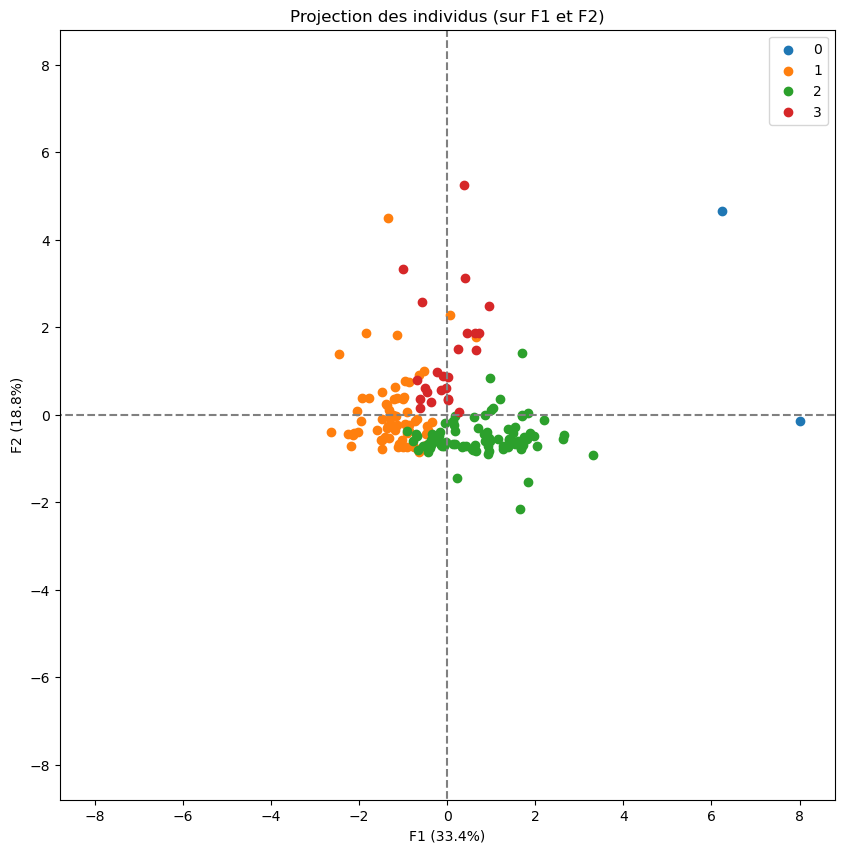

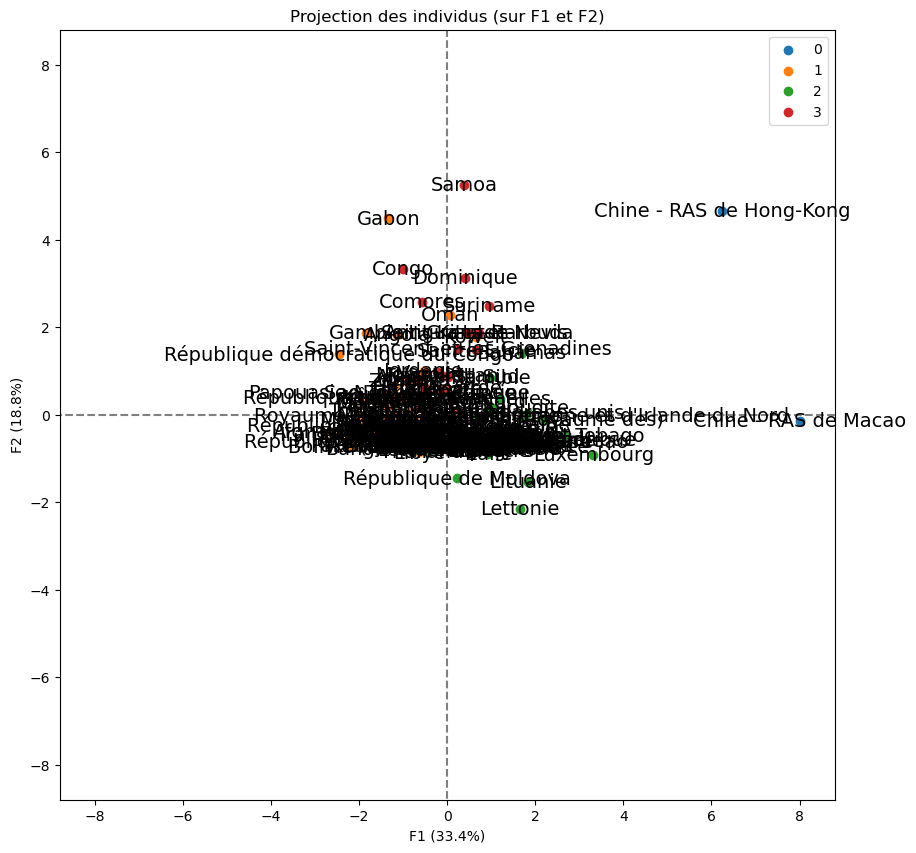

In [46]:
# Visualisation
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters)

# Visualisation avec noms des pays
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, labels = np.array(X.index))

### Sur le graphique de la projection de individus, On a des groupes assez homogène. C'est plutôt positif pour la classification.

In [47]:
# Trouver les tailles des clusters
df_new["Groupe"].value_counts()

Groupe
2    81
1    63
3    24
0     2
Name: count, dtype: int64

In [48]:
# 1/Visualiser les pays avec les différents groupes
# Exploration des différents cluters
for i in range(0,4):
    print(f"Group {i}:")
    print(", ".join(X_clusterise.index[clusters == i].sort_values())) 
    print(" ")

Group 0:
Chine - RAS de Hong-Kong, Chine - RAS de Macao
 
Group 1:
Afghanistan, Algérie, Angola, Azerbaïdjan, Bangladesh, Burkina Faso, Burundi, Bénin, Cameroun, Colombie, Côte d'Ivoire, Gabon, Gambie, Ghana, Guatemala, Guinée, Haïti, Honduras, Inde, Indonésie, Iran (République islamique d'), Iraq, Jordanie, Kenya, Kirghizistan, Koweït, Liban, Libye, Madagascar, Malawi, Mali, Mauritanie, Mexique, Mongolie, Mozambique, Myanmar, Nicaragua, Niger, Nigéria, Népal, Oman, Ouganda, Pakistan, Papouasie-Nouvelle-Guinée, Paraguay, Philippines, Rwanda, République centrafricaine, République démocratique du Congo, République-Unie de Tanzanie, Sierra Leone, Sénégal, Tadjikistan, Tchad, Togo, Tunisie, Turquie, Ukraine, Zambie, Zimbabwe, Égypte, Équateur, Éthiopie
 
Group 2:
Albanie, Allemagne, Arabie saoudite, Argentine, Australie, Autriche, Bahamas, Barbade, Belgique, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Brésil, Bélarus, Cambodge, Canada, Chili, Chine, Chine, contin

In [49]:
# Création df moyen de chaques variables par Cluster
X_clustered_mean = X_clusterise.groupby('Groupe').mean()
X_clustered_mean

Taux export volailles  Taux import volailles  \
Groupe                                                 
0                    5.626921               1.289479   
1                   -0.228825              -0.179166   
2                    0.058559              -0.380989   
3                   -0.065881               1.648693   

        Taux production volailles  Croissance_population (%)  \
Groupe                                                         
0                        5.467683                  -0.412980   
1                       -0.230629                   0.740700   
2                        0.135717                  -0.493544   
3                       -0.308284                  -0.244214   

        Stabilité politique       PIB  
Groupe                                 
0                  1.337925  3.485291  
1                 -0.889921 -0.600967  
2                  0.528371  0.503047  
3                  0.441298 -0.410685

<Axes: ylabel='Groupe'>

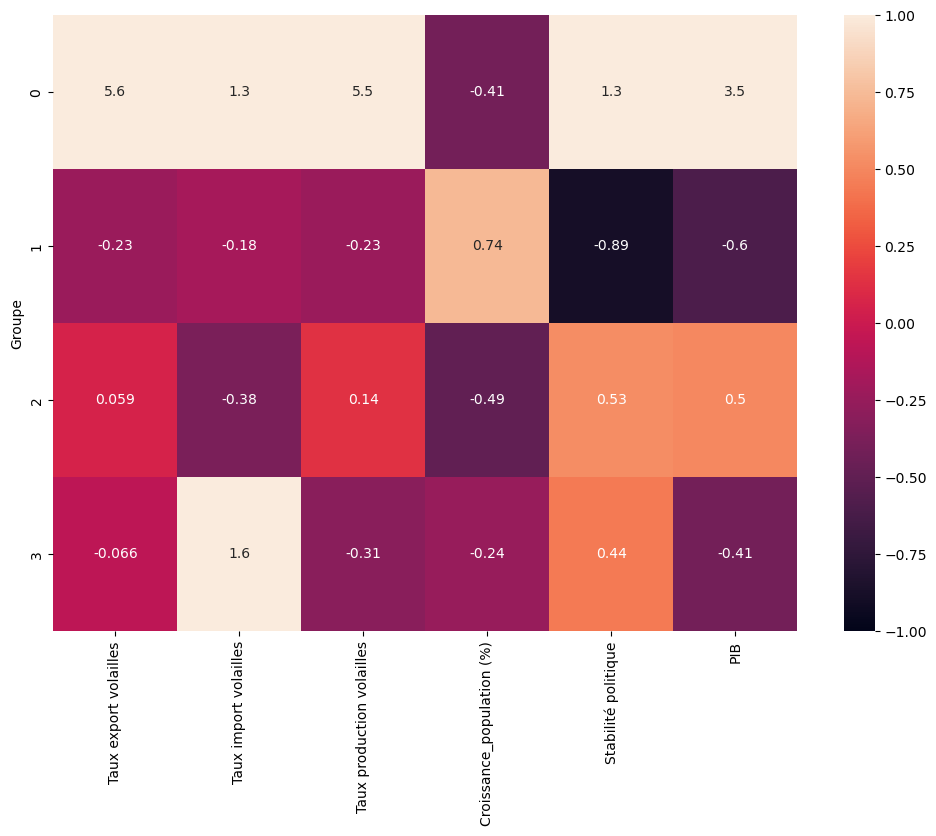

In [50]:
# heatmap de corrélations entre les différentes variables et les Cluster
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(X_clustered_mean, annot = True, vmin = -1, vmax = 1)

Pour un projet d'export depuis la france, on devrait ciblé un groupe à l'exportation faible ou nul (groupe 2; 1; 3) associé à une bonne capacité financière (bon PIB) (groupe 2 et 3), qui importe !

Sur la base du heatmap on observe que:

<b style="color:blue">
    
- les pays du groupe 0 sont caractérisés par un bon d'exportation d'importation, avec un niveau de production assez elevé, un PIB imortant avec une bonne stabilité politique). Elle présente par ailleurs un taux de croissance de population assez faible.
    
- Le pays du groupe 1 sont caractérisés par un taux de croissance assez elevé.
  
- Les pays du groupe 2 sont caractérisés par un une bonne stabilité politique, un PIB important et ont tendance à exporter.
 
- Les pays du groupe 3 sont caractérisés par un fort taux d'importation et une bonne stabilité politique.
    
    </b>

Ainsi les groupe 3 et 2 feraient une bonne cible

In [51]:
# 5/Sortir la liste des pays recommandés

In [52]:
recomadation_pays=X_clusterise[X_clusterise['Groupe']==3]
recomadation_pays

Taux export volailles  Taux import volailles  \
Zone                                                                            
Afrique du Sud                                0.057902               1.096202   
Antigua-et-Barbuda                            0.679603               1.959093   
Arménie                                      -0.271065               0.606010   
Bulgarie                                     -0.118481               0.369927   
Cabo Verde                                   -0.271065               0.716203   
Comores                                      -0.381338               3.167634   
Congo                                        -0.095430               3.593456   
Dominique                                    -0.364671               3.712622   
Grenade                                      -0.271065               2.238796   
Géorgie                                       0.792324               0.397282   
Kazakhstan                                   -0.358644               1.072485   
Kiribati                                     -0.271065               0.586494   
Libéria                                      -0.328157               1.278077   
Macédoine du Nord                            -0.307112               0.753455   
Maldives                                     -0.271065               0.562032   
Saint-Kitts-et-Nevis                         -0.045750               2.288614   
Saint-Vincent-et-les Grenadines              -0.271065               1.806022   
Sainte-Lucie                                 -0.378947               1.822968   
Samoa                                        -0.317814               6.203551   
Sao Tomé-et-Principe                         -0.271065               0.643773   
Suriname                                      2.296027               2.158437   
Timor-Leste                                  -0.271065               0.977649   
Vanuatu                                      -0.271065               1.107611   
Îles Salomon                                 -0.271065               0.450249   

                                 Taux production volailles  \
Zone                                                         
Afrique du Sud                                    0.477422   
Antigua-et-Barbuda                               -0.351276   
Arménie                                          -0.451082   
Bulgarie                                         -0.367606   
Cabo Verde                                       -0.286287   
Comores                                          -0.501019   
Congo                                            -0.494289   
Dominique                                        -0.443397   
Grenade                                          -0.209780   
Géorgie                                          -0.176339   
Kazakhstan                                       -0.399524   
Kiribati                                         -0.357174   
Libéria                                          -0.227383   
Macédoine du Nord                                -0.554474   
Maldives                                         -0.260920   
Saint-Kitts-et-Nevis                             -0.528129   
Saint-Vincent-et-les Grenadines                  -0.413318   
Sainte-Lucie                                      0.410587   
Samoa                                            -0.433686   
Sao Tomé-et-Principe                             -0.300004   
Suriname                                         -0.015689   
Timor-Leste                                      -0.482503   
Vanuatu                                          -0.466746   
Îles Salomon                                     -0.566197   

                                 Croissance_population (%)  \
Zone                                                         
Afrique du Sud                                   -0.187959   
Antigua-et-Barbuda                               -0.187959   
Arménie                                          -0.638002   
Bul